In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from jours_feries_france import JoursFeries

In [2]:
weather_data = pd.read_csv('./external_data/external_data.csv')
print(weather_data.head())
print(weather_data.info())

   numer_sta                 date    pmer  tend  cod_tend   dd   ff       t  \
0       7149  2021-01-01 00:00:00  100810    80         1  270  1.8  272.75   
1       7149  2021-01-01 03:00:00  100920   110         3  300  1.7  271.25   
2       7149  2021-01-01 06:00:00  100950    30         3  290  2.6  271.95   
3       7149  2021-01-01 09:00:00  101100   150         2  280  1.7  272.45   
4       7149  2021-01-01 12:00:00  101110    30         0   50  1.0  276.95   

       td   u  ...  hnuage1  nnuage2  ctype2  hnuage2  nnuage3  ctype3  \
0  272.15  96  ...    600.0      NaN     NaN      NaN      NaN     NaN   
1  270.95  98  ...   1500.0      2.0     3.0   3000.0      NaN     NaN   
2  271.65  98  ...    480.0      4.0     6.0   2000.0      6.0     3.0   
3  272.05  97  ...   1740.0      3.0     3.0   2800.0      NaN     NaN   
4  274.15  82  ...    330.0      4.0     6.0    570.0      7.0     6.0   

   hnuage3  nnuage4  ctype4  hnuage4  
0      NaN      NaN     NaN      NaN  
1 

In [3]:
weather_data = weather_data.dropna(axis=1, thresh = 0.9 * len(weather_data))

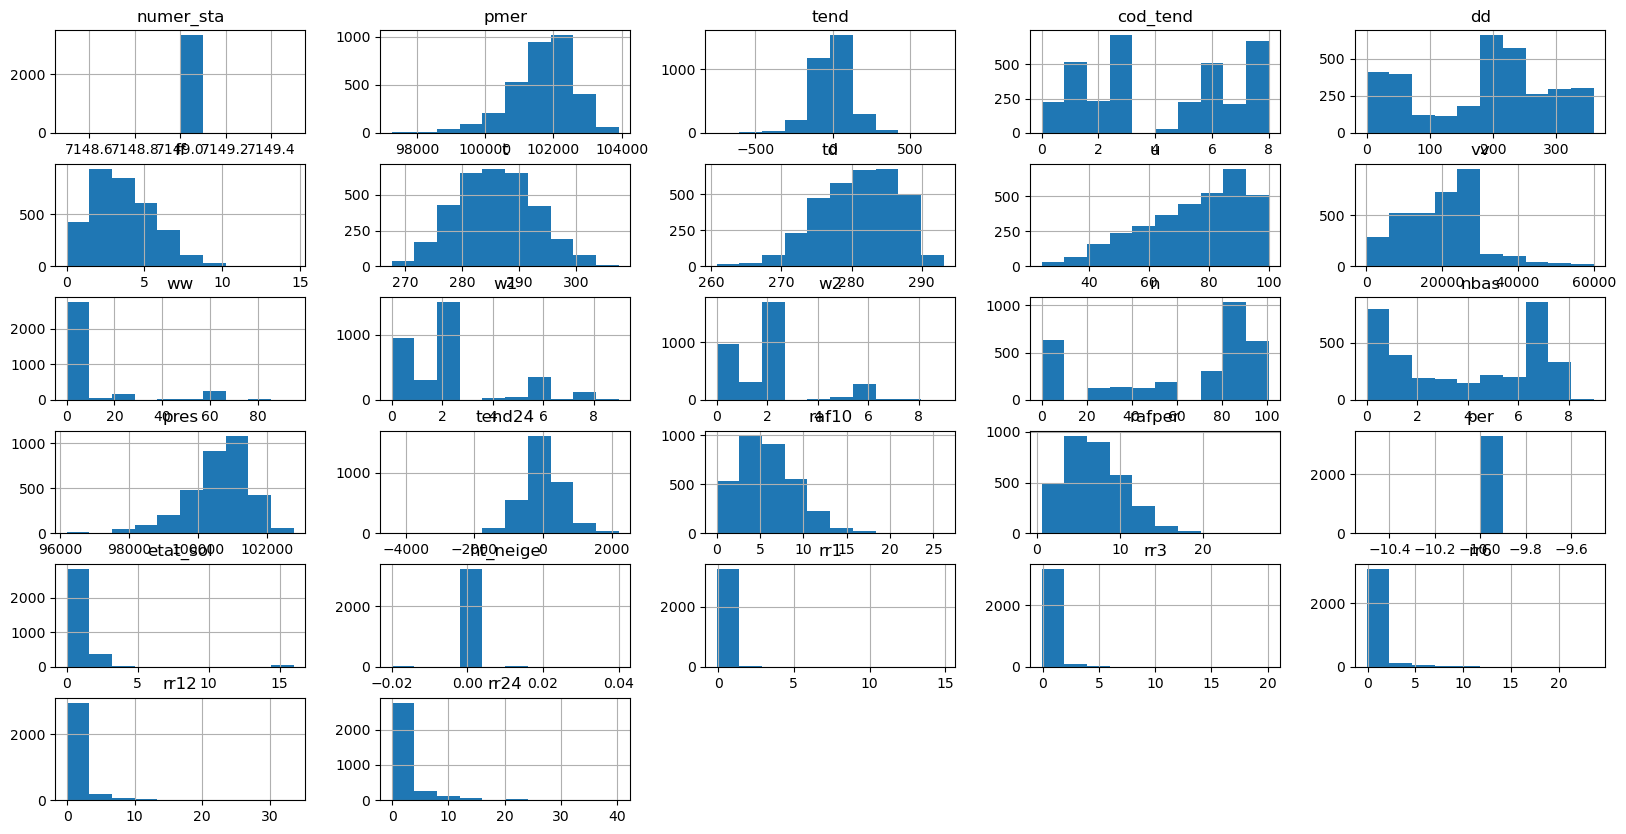

In [4]:
weather_data.hist(figsize=(20, 10))
plt.show()

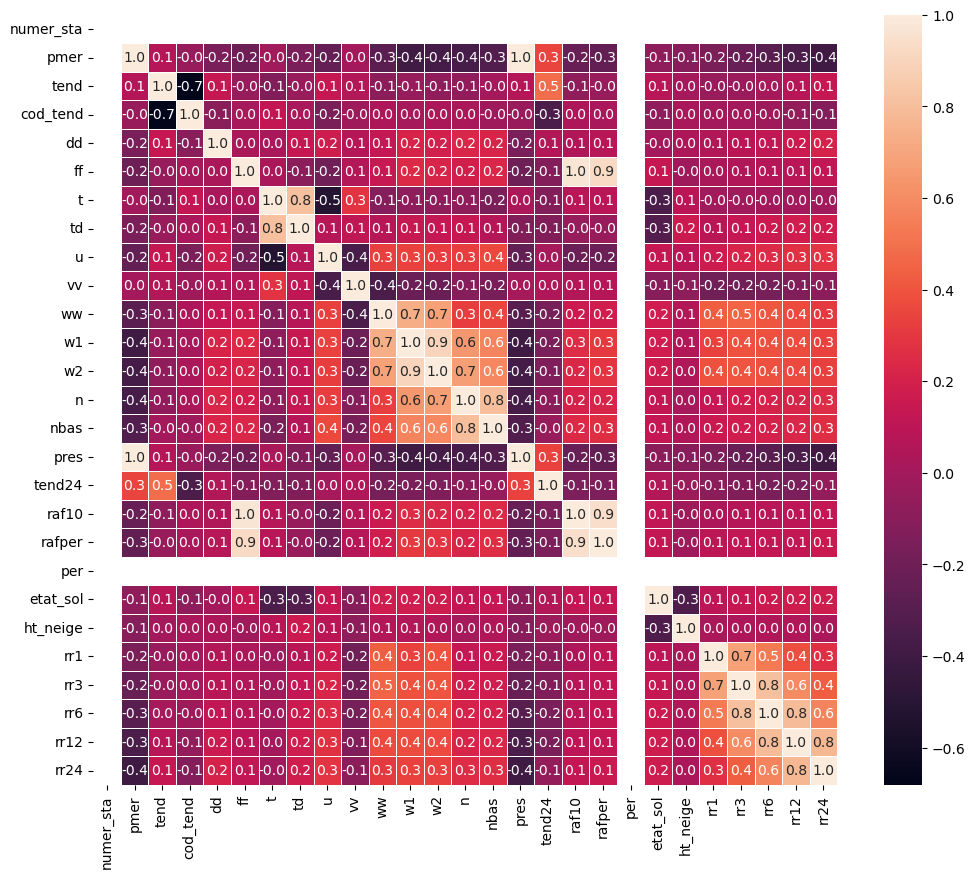

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    weather_data.select_dtypes(include=['int64', 'float64']).corr(),
    annot=True, fmt=".1f", linewidth=.5
);

In [6]:
mask = ["date", "pres", "ff", "t", "u", "vv", "n", "ht_neige", "rr1"]

weather_data = weather_data[mask]
weather_data['ht_neige'] = weather_data['ht_neige'].apply(lambda x: x if x >= 0 else np.nan)
weather_data

,date,pres,ff,t,u,vv,n,ht_neige,rr1
0,2021-01-01 00:00:00,99680,1.8,272.75,96,990,10.0,0.00,0.0
1,2021-01-01 03:00:00,99790,1.7,271.25,98,210,25.0,0.00,0.0
2,2021-01-01 06:00:00,99820,2.6,271.95,98,3660,90.0,0.00,0.0
3,2021-01-01 09:00:00,99970,1.7,272.45,97,3500,50.0,0.01,0.0
4,2021-01-01 12:00:00,100000,1.0,276.95,82,8000,90.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
3317,2020-09-30 09:00:00,100480,4.4,289.95,82,18000,90.0,0.00,0.0
3318,2020-09-30 12:00:00,100270,4.9,292.05,66,25000,90.0,0.00,0.0
3319,2020-09-30 15:00:00,100090,4.1,291.55,72,25000,90.0,0.00,0.0
3320,2020-09-30 18:00:00,99960,2.7,290.15,73,40820,100.0,0.00,0.0


In [7]:
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [8]:
weather_data.set_index('date', inplace=True)
weather_data = weather_data[~weather_data.index.duplicated(keep='first')]

In [9]:
weather_data_interpolated = weather_data.resample('h').interpolate(method='linear')

In [10]:
weather_data_interpolated

,pres,ff,t,u,vv,n,ht_neige,rr1
date,,,,,,,,
2020-09-01 00:00:00,100960.000000,1.600000,285.750000,81.000000,30000.000000,0.000000,0.0,0.0
2020-09-01 01:00:00,100940.000000,1.433333,285.150000,83.333333,28333.333333,0.000000,0.0,0.0
2020-09-01 02:00:00,100920.000000,1.266667,284.550000,85.666667,26666.666667,0.000000,0.0,0.0
2020-09-01 03:00:00,100900.000000,1.100000,283.950000,88.000000,25000.000000,0.000000,0.0,0.0
2020-09-01 04:00:00,100903.333333,1.333333,284.050000,89.000000,25000.000000,3.333333,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-10-21 08:00:00,100073.333333,7.233333,285.383333,72.000000,30000.000000,33.333333,0.0,0.0
2021-10-21 09:00:00,100150.000000,7.000000,286.050000,70.000000,30000.000000,25.000000,0.0,0.0
2021-10-21 10:00:00,100130.000000,6.200000,286.116667,73.000000,22333.333333,46.666667,0.0,0.2


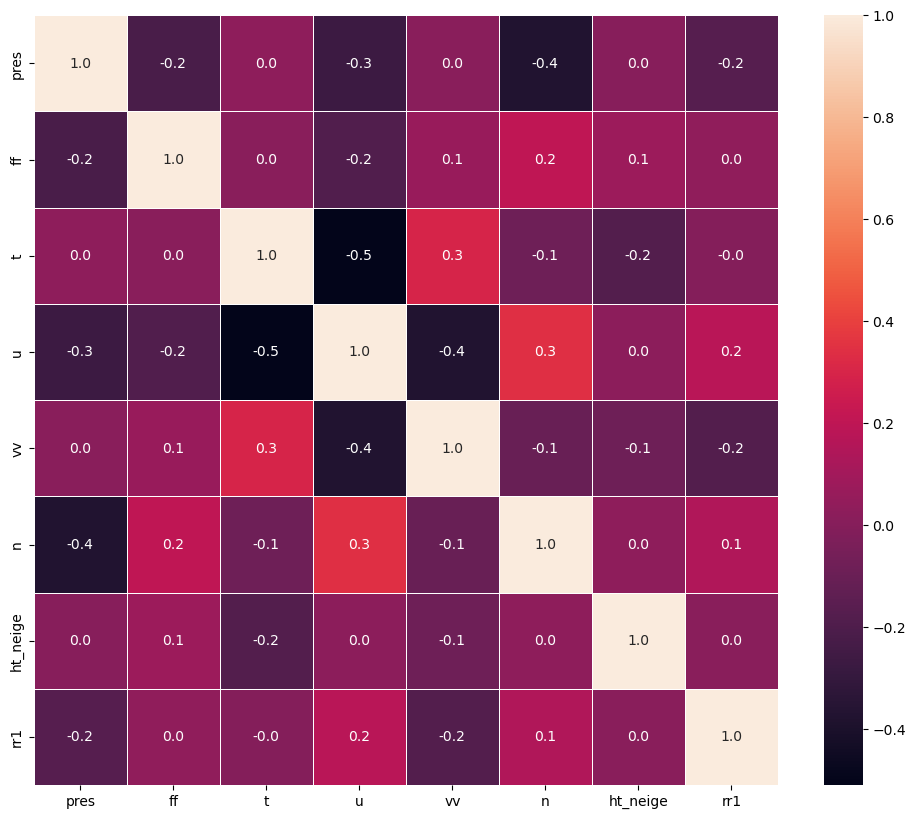

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    weather_data_interpolated.select_dtypes(include=['int64', 'float64']).corr(),
    annot=True, fmt=".1f", linewidth=.5
);

In [12]:
data = pd.read_parquet(Path("data") / "train.parquet")
print(data.head())
print(data.info())

# Define holidays for 2020 and 2021
holidays_2020_2021 = (
    list(JoursFeries.for_year(2020).values()) +
    list(JoursFeries.for_year(2021).values())
)
holidays_2020_2021 = pd.to_datetime(holidays_2020_2021)
print(holidays_2020_2021[:5])

                counter_id              counter_name    site_id  \
48321  100007049-102007049  28 boulevard Diderot E-O  100007049   
48324  100007049-102007049  28 boulevard Diderot E-O  100007049   
48327  100007049-102007049  28 boulevard Diderot E-O  100007049   
48330  100007049-102007049  28 boulevard Diderot E-O  100007049   
48333  100007049-102007049  28 boulevard Diderot E-O  100007049   

                  site_name  bike_count                date  \
48321  28 boulevard Diderot         0.0 2020-09-01 02:00:00   
48324  28 boulevard Diderot         1.0 2020-09-01 03:00:00   
48327  28 boulevard Diderot         0.0 2020-09-01 04:00:00   
48330  28 boulevard Diderot         4.0 2020-09-01 15:00:00   
48333  28 boulevard Diderot         9.0 2020-09-01 18:00:00   

      counter_installation_date         coordinates counter_technical_id  \
48321                2013-01-18  48.846028,2.375429          Y2H15027244   
48324                2013-01-18  48.846028,2.375429          Y2H15

In [13]:
def _encode_dates(X):
    """
    Encode date information from the 'date' column.
    Adds year, month, day, weekday, hour, holiday, and weekend indicators.
    """

    lockdown_periods = [
        ("2020-03-17", "2020-05-11"),
        ("2020-10-30", "2020-12-14"),
        ("2021-04-03", "2021-06-30"),
    ]
    
    lockdown_ranges = [
        (pd.to_datetime(start), pd.to_datetime(end)) for start, end in lockdown_periods
    ]
    
    X = X.copy()
    X["year"] = X["date"].dt.year
    X["month"] = X["date"].dt.month
    X["day"] = X["date"].dt.day
    X["weekday"] = X["date"].dt.weekday
    X["hour"] = X["date"].dt.hour
    X['holiday'] = X['date'].isin(holidays_2020_2021).astype(int)
    X['weekend'] = (X['date'].dt.dayofweek > 4).astype(int)
    X["lockdown"] = X["date"].apply(
        lambda d: any(start <= d <= end for start, end in lockdown_ranges)
    ).astype(int)
    
    return X.drop(columns=["date"])

# Check the date column
print(data["date"].head())

# Apply encoding function
encoded_dates = _encode_dates(data[["date"]])
print(encoded_dates.head())

48321   2020-09-01 02:00:00
48324   2020-09-01 03:00:00
48327   2020-09-01 04:00:00
48330   2020-09-01 15:00:00
48333   2020-09-01 18:00:00
Name: date, dtype: datetime64[us]
       year  month  day  weekday  hour  holiday  weekend  lockdown
48321  2020      9    1        1     2        0        0         0
48324  2020      9    1        1     3        0        0         0
48327  2020      9    1        1     4        0        0         0
48330  2020      9    1        1    15        0        0         0
48333  2020      9    1        1    18        0        0         0


In [14]:
merged_data = data.merge(weather_data_interpolated, on='date', how='left')
print(merged_data.head())

            counter_id              counter_name    site_id  \
0  100007049-102007049  28 boulevard Diderot E-O  100007049   
1  100007049-102007049  28 boulevard Diderot E-O  100007049   
2  100007049-102007049  28 boulevard Diderot E-O  100007049   
3  100007049-102007049  28 boulevard Diderot E-O  100007049   
4  100007049-102007049  28 boulevard Diderot E-O  100007049   

              site_name  bike_count                date  \
0  28 boulevard Diderot         0.0 2020-09-01 02:00:00   
1  28 boulevard Diderot         1.0 2020-09-01 03:00:00   
2  28 boulevard Diderot         0.0 2020-09-01 04:00:00   
3  28 boulevard Diderot         4.0 2020-09-01 15:00:00   
4  28 boulevard Diderot         9.0 2020-09-01 18:00:00   

  counter_installation_date         coordinates counter_technical_id  \
0                2013-01-18  48.846028,2.375429          Y2H15027244   
1                2013-01-18  48.846028,2.375429          Y2H15027244   
2                2013-01-18  48.846028,2.375429   

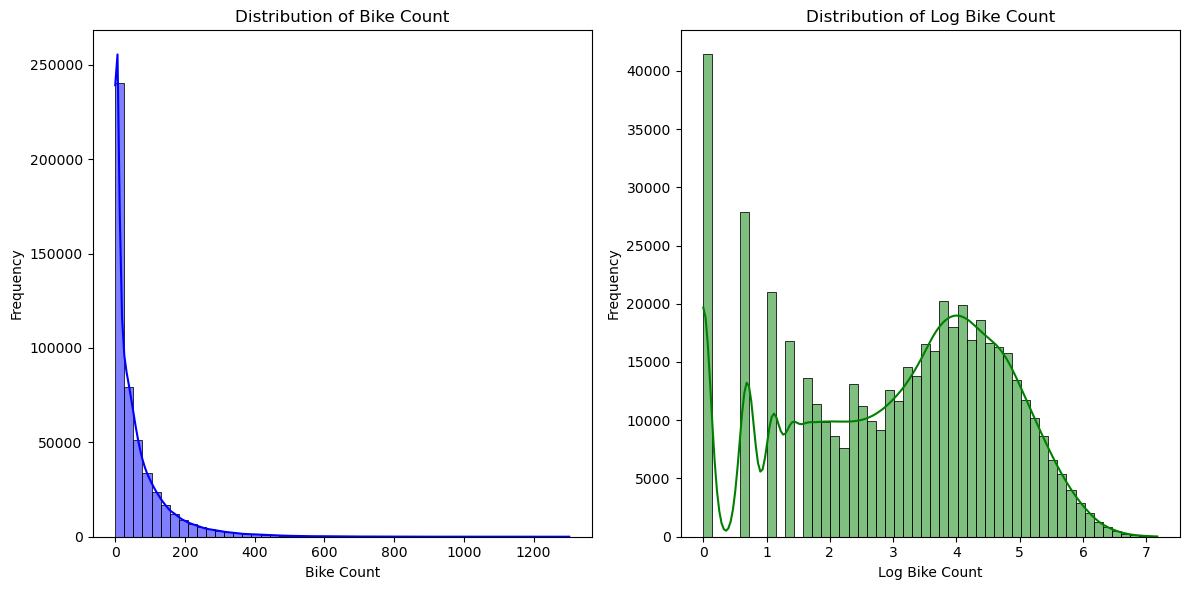

In [16]:
plt.figure(figsize=(12, 6))

# Distribution of bike_count
plt.subplot(1, 2, 1)
sns.histplot(merged_data['bike_count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Bike Count')
plt.xlabel('Bike Count')
plt.ylabel('Frequency')

# Distribution of log_bike_count
plt.subplot(1, 2, 2)
sns.histplot(merged_data['log_bike_count'], bins=50, kde=True, color='green')
plt.title('Distribution of Log Bike Count')
plt.xlabel('Log Bike Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
# Sample a smaller subset of the data for scatter plots to avoid memory issues
sampled_data = merged_data.sample(n=5000, random_state=42)  # Sample 5000 rows

# Visualize relationships with the target (log_bike_count) using the smaller sample
plt.figure(figsize=(12, 10))

# Scatter plot for selected numerical variables
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=sampled_data, x=var, y='log_bike_count', alpha=0.3)
    plt.title(f'Log Bike Count vs {var}')
    plt.xlabel(var)
    plt.ylabel('Log Bike Count')

plt.tight_layout()
plt.show()

NameError: name 'variables_to_plot' is not defined

<Figure size 1200x1000 with 0 Axes>

In [17]:
numerical_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numerical_cols].corr()

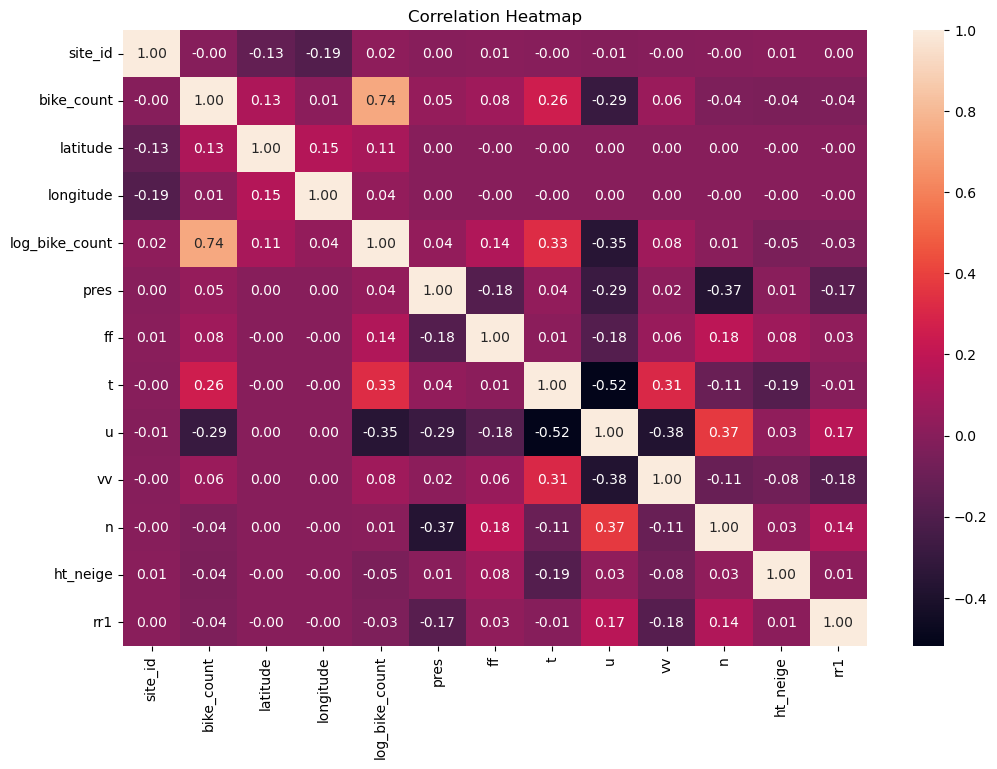

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

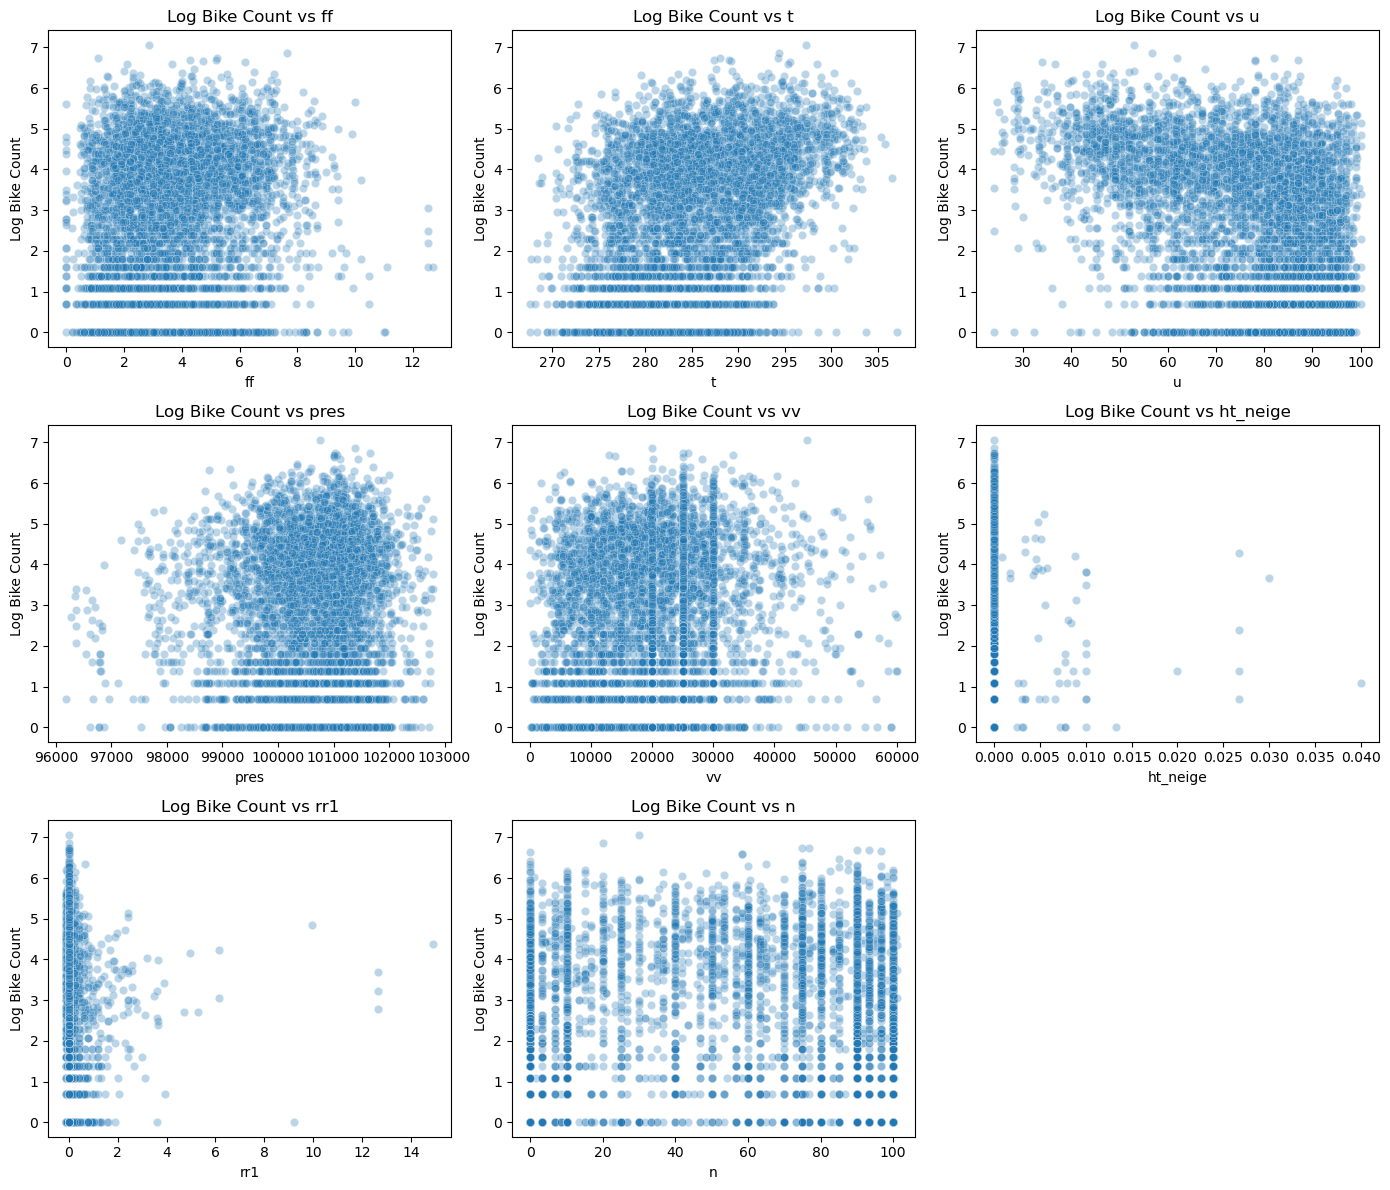

In [23]:
plt.figure(figsize=(14, 12))  # Increase figure size


variables_to_plot = ['ff', 't', 'u', 'pres', 'vv', 'ht_neige', 'rr1', 'n']
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=sampled_data, x=var, y='log_bike_count', alpha=0.3)
    plt.title(f'Log Bike Count vs {var}')
    plt.xlabel(var)
    plt.ylabel('Log Bike Count')

plt.tight_layout()
plt.show()